# 멀티 퍼셉트론 모델

## mnist 데이터셋 불러오기

In [ ]:
# mnist 데이터셋 활용해서 멀티 퍼셉트론 모델 만들기
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

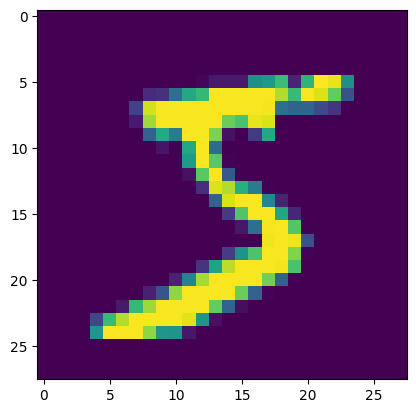

In [ ]:
# 손글씨 이미지 출력
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [ ]:
x_train.min(), x_train.max()

(np.uint8(0), np.uint8(255))

In [ ]:
# 0~1값을 가질 때 딥러닝이 잘 동작하기 떄문에 표준화 진행
x_train = x_train/255
x_test = x_test/255

In [ ]:
# 0~9까지의 y값 존재
y_train.min(), y_train.max()

(np.uint8(0), np.uint8(9))

In [ ]:
# y값이 범주형이므로 원핫 인코딩 진행
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# 멀티 퍼셉트론 모델 생성
from keras.models import Sequential
from keras.layers import Dense, Flatten
model = Sequential()
model.add(Flatten(input_shape=(28,28))) # 2차원을 1차원으로 변환
model.add(Dense(10, activation='softmax')) # 1차원입력을 10개로 분류

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1) # vervose : 정보를 상세히 출력, epoch, batch_size ppt 참고

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9297 - loss: 0.2526
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9280 - loss: 0.2589
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9297 - loss: 0.2530
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9301 - loss: 0.2550
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9329 - loss: 0.2474
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9316 - loss: 0.2516
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9328 - loss: 0.2483
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9312 - loss: 0.2484
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9311 - loss: 0.2469
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9319 - loss: 0.2468


In [ ]:
model.evaluate(x_test, y_test, verbose=0) # loss, accuracy

[0.2630421221256256, 0.927299976348877]

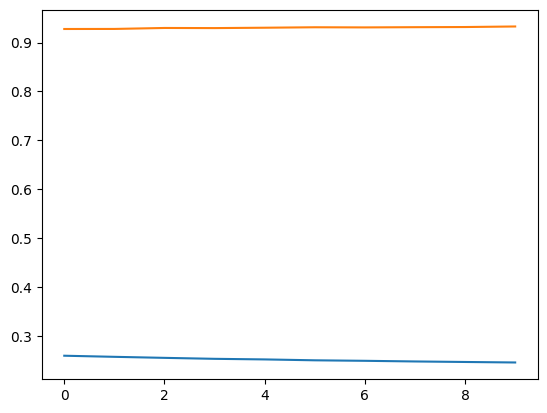

In [ ]:
# plot을 통해 model의 loss, accuracy 변화 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

In [ ]:
# 더 좋은 성능을 위해 100개씩의 은닉값을 가진 은닉층 2개 추가
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# vervose : 정보를 상세히 출력, epoch, batch_size ppt 참고
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9950 - loss: 0.0167 - val_accuracy: 0.9786 - val_loss: 0.0751
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9948 - loss: 0.0174 - val_accuracy: 0.9786 - val_loss: 0.0839
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9960 - loss: 0.0147 - val_accuracy: 0.9770 - val_loss: 0.0872
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9963 - loss: 0.0127 - val_accuracy: 0.9777 - val_loss: 0.0839
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9975 - loss: 0.0093 - val_accuracy: 0.9771 - val_loss: 0.0923
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9963 - loss: 0.0117 - val_accuracy: 0.9750 - val_loss: 0.0975
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9955 - loss: 0.0133 - val_accuracy: 0.9758 - val_loss: 0.1032
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9971 - loss: 0.0090 - val_accuracy: 0.

In [ ]:
model.evaluate(x_test, y_test, verbose=0)

[0.07755304127931595, 0.9765999913215637]

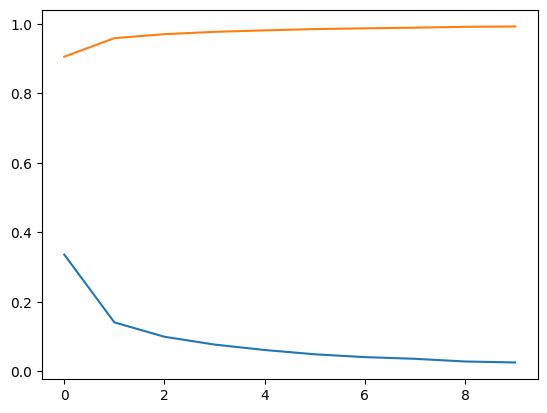

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

실습 1 : 위 학습 결과를 해석해보세요. 그리고 그 근거를 찾아보세요.
- 정확도가 향상되었다. 더 좋은 결과의 모델이다. 과소적합이다. 과대적합이다 등

# CNN

In [ ]:
# CNN에 필요한 레이어 추가
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
# 모델 생성
conv_model = Sequential()
conv_model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
conv_model.add(MaxPooling2D(pool_size=(2,2)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# convolution layer, max pooling layer 추가
conv_model.add(Conv2D(15, (3,3), activation='relu'))
conv_model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
# flatten and classification
conv_model.add(Flatten())
conv_model.add(Dense(64, activation='relu'))
conv_model.add(Dense(10, activation='softmax'))

In [ ]:
# compile
conv_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 모델 학습
conv_history = conv_model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.9952 - loss: 0.0167 - val_accuracy: 0.9895 - val_loss: 0.0337
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 62ms/step - accuracy: 0.9956 - loss: 0.0137 - val_accuracy: 0.9901 - val_loss: 0.0341
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 65ms/step - accuracy: 0.9954 - loss: 0.0142 - val_accuracy: 0.9885 - val_loss: 0.0345
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.9966 - loss: 0.0113 - val_accuracy: 0.9909 - val_loss: 0.0334
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.9974 - loss: 0.0092 - val_accuracy: 0.9901 - val_loss: 0.0343
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.9968 - loss: 0.0096 - val_accuracy: 0.9899 - val_loss: 0.0359
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 64ms/step - accuracy: 0.9971 - loss: 0.0082 - val_accuracy: 0.9906 - val_loss: 0.0341
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - accuracy: 0.9978 - loss: 0.0079 - 

In [ ]:
conv_model.evaluate(x_test, y_test, verbose=0)

[0.04874847084283829, 0.9879000186920166]

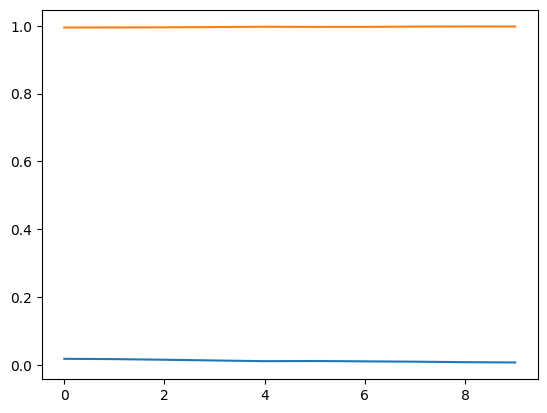

In [ ]:
plt.plot(conv_history.history['loss'])
plt.plot(conv_history.history['accuracy'])

실습 2 : 위 학습 결과를 해석해보세요. 그리고 그 근거를 찾아보세요.
- 정확도가 향상되었다. 더 좋은 결과의 모델이다. 과소적합이다. 과대적합이다 등